In [171]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
# Load datasets
load_data = pd.read_excel('C:\\Users\death\\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\LoadTexasERCOT.xlsx')
weather_data1 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\WeatherStation1.xlsx')
weather_data2 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\WeatherStation2.xlsx')
weather_data3 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\WeatherStation3.xlsx')

target = 'WEST'

<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
C:\Users\death\AppData\Local\Temp\ipykernel_11796\791961918.py:15: SyntaxWarning: invalid escape sequence '\d'
  load_data = pd.read_excel('C:\\Users\death\\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\LoadTexasERCOT.xlsx')
C:\Users\death\AppData\Local\Temp\ipykernel_11796\791961918.py:16: SyntaxWarning: invalid escape sequence '\D'
  weather_data1 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETW

In [172]:
weather_data1.head(5)

,Year,Month,Day,Hour,Minute,Relative Humidity,Temperature,Pressure
0,2012,1,1,0,30,39.19,6,950
1,2012,1,1,1,30,44.45,5,950
2,2012,1,1,2,30,53.94,4,950
3,2012,1,1,3,30,63.77,2,960
4,2012,1,1,4,30,71.93,2,960


In [173]:
weather_data3.head(5)

,Year,Month,Day,Hour,Minute,Relative Humidity,Temperature,Pressure
0,2012,1,1,0,30,42.80,6,960
1,2012,1,1,1,30,56.15,5,960
2,2012,1,1,2,30,63.72,3,960
3,2012,1,1,3,30,69.80,2,960
4,2012,1,1,4,30,74.92,1,970


In [174]:

weather_data2.head(5)

,Year,Month,Day,Hour,Minute,Relative Humidity,Temperature,Pressure
0,2012,1,1,0,30,63.98,8,950
1,2012,1,1,1,30,49.59,6,950
2,2012,1,1,2,30,46.28,4,950
3,2012,1,1,3,30,52.89,3,960
4,2012,1,1,4,30,62.81,3,960


In [175]:
import pandas as pd

# Assuming weather_data1 is already defined and contains the necessary data

# Print column names to verify
print("Columns in weather_data1:", weather_data1.columns)

# Step 1: Preprocessing
# Convert to Datetime
weather_data1['DateTime'] = pd.to_datetime(weather_data1[['Year', 'Month', 'Day', 'Hour' ]])

# Drop the original columns
weather_data1.drop(columns=['Year', 'Month', 'Day', 'Hour' ], inplace=True)

# Display the first few rows to verify the changes
weather_data1.head()

Columns in weather_data1: Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Relative Humidity',
       'Temperature', 'Pressure'],
      dtype='object')


,Minute,Relative Humidity,Temperature,Pressure,DateTime
0,30,39.19,6,950,2012-01-01 00:00:00
1,30,44.45,5,950,2012-01-01 01:00:00
2,30,53.94,4,950,2012-01-01 02:00:00
3,30,63.77,2,960,2012-01-01 03:00:00
4,30,71.93,2,960,2012-01-01 04:00:00


In [176]:
weather_data3['DateTime'] = pd.to_datetime(weather_data2[['Year', 'Month', 'Day', 'Hour']])
weather_data3.drop(columns=['Year', 'Month', 'Day', 'Hour'], inplace=True)
weather_data2['DateTime'] = pd.to_datetime(weather_data2[['Year', 'Month', 'Day', 'Hour']])
weather_data2.drop(columns=['Year', 'Month', 'Day', 'Hour'], inplace=True)
load_data.drop(columns=[col for col in load_data.columns if col not in ['Hour_End', target]], inplace=True)


In [177]:
merged_data = pd.merge(load_data, weather_data1, left_on='Hour_End', right_on='DateTime')
merged_data

,Hour_End,WEST,Minute,Relative Humidity,Temperature,Pressure,DateTime
0,2012-01-01 03:00:00,840.902848,30,63.77,2,960,2012-01-01 03:00:00
1,2012-01-01 06:00:00,892.341115,30,79.76,0,960,2012-01-01 06:00:00
2,2012-01-01 09:00:00,1009.202331,30,48.63,6,960,2012-01-01 09:00:00
3,2012-01-01 12:00:00,964.065395,30,25.26,12,960,2012-01-01 12:00:00
4,2012-01-01 15:00:00,895.595594,30,23.44,12,960,2012-01-01 15:00:00
...,...,...,...,...,...,...,...
11682,2015-12-31 09:00:00,1366.707739,30,95.18,4,950,2015-12-31 09:00:00
11683,2015-12-31 12:00:00,1309.101953,30,86.81,7,950,2015-12-31 12:00:00
11684,2015-12-31 15:00:00,1183.585632,30,83.39,6,950,2015-12-31 15:00:00
11685,2015-12-31 18:00:00,1229.206403,30,72.86,-2,950,2015-12-31 18:00:00


In [178]:
merged_data2 = pd.merge(load_data, weather_data3, left_on='Hour_End', right_on='DateTime')
merged_data2

,Hour_End,WEST,Minute,Relative Humidity,Temperature,Pressure,DateTime
0,2012-01-01 03:00:00,840.902848,30,69.80,2,960,2012-01-01 03:00:00
1,2012-01-01 06:00:00,892.341115,30,75.63,0,970,2012-01-01 06:00:00
2,2012-01-01 09:00:00,1009.202331,30,45.26,6,970,2012-01-01 09:00:00
3,2012-01-01 12:00:00,964.065395,30,29.36,12,970,2012-01-01 12:00:00
4,2012-01-01 15:00:00,895.595594,30,27.66,11,970,2012-01-01 15:00:00
...,...,...,...,...,...,...,...
11682,2015-12-31 09:00:00,1366.707739,30,100.00,1,960,2015-12-31 09:00:00
11683,2015-12-31 12:00:00,1309.101953,30,96.39,4,960,2015-12-31 12:00:00
11684,2015-12-31 15:00:00,1183.585632,30,89.95,4,960,2015-12-31 15:00:00
11685,2015-12-31 18:00:00,1229.206403,30,70.93,-2,960,2015-12-31 18:00:00


In [179]:
merged_data3 = pd.merge(load_data, weather_data2, left_on='Hour_End', right_on='DateTime' )
merged_data3

,Hour_End,WEST,Minute,Relative Humidity,Temperature,Pressure,DateTime
0,2012-01-01 03:00:00,840.902848,30,52.89,3,960,2012-01-01 03:00:00
1,2012-01-01 06:00:00,892.341115,30,73.31,1,960,2012-01-01 06:00:00
2,2012-01-01 09:00:00,1009.202331,30,46.52,7,960,2012-01-01 09:00:00
3,2012-01-01 12:00:00,964.065395,30,25.48,13,960,2012-01-01 12:00:00
4,2012-01-01 15:00:00,895.595594,30,25.14,13,960,2012-01-01 15:00:00
...,...,...,...,...,...,...,...
11682,2015-12-31 09:00:00,1366.707739,30,85.43,6,950,2015-12-31 09:00:00
11683,2015-12-31 12:00:00,1309.101953,30,70.70,8,950,2015-12-31 12:00:00
11684,2015-12-31 15:00:00,1183.585632,30,67.66,8,950,2015-12-31 15:00:00
11685,2015-12-31 18:00:00,1229.206403,30,73.87,0,950,2015-12-31 18:00:00


In [180]:
# stack all 3 mergered dataframes
final_data = pd.concat([merged_data, merged_data2, merged_data3], axis=0)
merged_data  = final_data
#drop the DateTime column
merged_data.drop(columns=['DateTime'], inplace=True)
merged_data

,Hour_End,WEST,Minute,Relative Humidity,Temperature,Pressure
0,2012-01-01 03:00:00,840.902848,30,63.77,2,960
1,2012-01-01 06:00:00,892.341115,30,79.76,0,960
2,2012-01-01 09:00:00,1009.202331,30,48.63,6,960
3,2012-01-01 12:00:00,964.065395,30,25.26,12,960
4,2012-01-01 15:00:00,895.595594,30,23.44,12,960
...,...,...,...,...,...,...
11682,2015-12-31 09:00:00,1366.707739,30,85.43,6,950
11683,2015-12-31 12:00:00,1309.101953,30,70.70,8,950
11684,2015-12-31 15:00:00,1183.585632,30,67.66,8,950
11685,2015-12-31 18:00:00,1229.206403,30,73.87,0,950


In [181]:
import holidays

us_holidays = holidays.US(years=merged_data['Hour_End'].dt.year.unique(), state='TX')
merged_data['HolidayFlag'] = merged_data['Hour_End'].apply(lambda x: 1 if x in us_holidays else 0)
holiday_flag_1_count = merged_data['HolidayFlag'].sum()
holiday_flag_0_count = len(merged_data) - holiday_flag_1_count

print(f"Number of rows where HolidayFlag_1 is 1: {holiday_flag_1_count}")
print(f"Number of rows where HolidayFlag_1 is 0: {holiday_flag_0_count}")

Number of rows where HolidayFlag_1 is 1: 1869
Number of rows where HolidayFlag_1 is 0: 33192


## Creating Input features


In [182]:
import pandas as pd

# Assuming 'merged_data' DataFrame has 'Hour_End' column as datetime object
# Example: merged_data['Hour_End'] = pd.to_datetime(merged_data['Hour_End'])

# Step 1: Add 'Time of Day Index' (Hour of the day)
merged_data['TimeOfDayIndex'] = merged_data['Hour_End'].dt.hour

# Step 2: Add 'Day of the Week Index' (0 = Monday, 6 = Sunday)
merged_data['DayOfWeekIndex'] = merged_data['Hour_End'].dt.dayofweek

# Step 3: Add 'Holiday Flag' using the 'holidays' library for U.S. and Texas holidays

# Step 4: Manually create 24 columns for 'TimeOfDayIndex' and 7 columns for 'DayOfWeekIndex'
for hour in range(24):
    merged_data[f'TimeOfDay_{hour}'] = (merged_data['TimeOfDayIndex'] == hour).astype(int)

for day in range(7):
    merged_data[f'DayOfWeek_{day}'] = (merged_data['DayOfWeekIndex'] == day).astype(int)

# Drop the original 'TimeOfDayIndex' and 'DayOfWeekIndex' columns
merged_data.drop(columns=['TimeOfDayIndex', 'DayOfWeekIndex'], inplace=True)

# Drop 'DateTime' column if it exists
if 'DateTime' in merged_data.columns:
    merged_data.drop(['DateTime'], axis=1, inplace=True)

# Display the first few rows to verify the manually created features
print(merged_data.head())

# Count the number of rows where 'HolidayFlag' is 1 and 0
# Display the column names to verify the new columns
print('Column names are:\n' + ', '.join(merged_data.columns))
print('shape of the data is:', merged_data.shape)

             Hour_End         WEST  Minute  Relative Humidity  Temperature  \
0 2012-01-01 03:00:00   840.902848      30              63.77            2   
1 2012-01-01 06:00:00   892.341115      30              79.76            0   
2 2012-01-01 09:00:00  1009.202331      30              48.63            6   
3 2012-01-01 12:00:00   964.065395      30              25.26           12   
4 2012-01-01 15:00:00   895.595594      30              23.44           12   

   Pressure  HolidayFlag  TimeOfDay_0  TimeOfDay_1  TimeOfDay_2  TimeOfDay_3  \
0       960            1            0            0            0            1   
1       960            1            0            0            0            0   
2       960            1            0            0            0            0   
3       960            1            0            0            0            0   
4       960            1            0            0            0            0   

   TimeOfDay_4  TimeOfDay_5  TimeOfDay_6  TimeOfDa

In [183]:
numerical_features = ['Pressure' , 'Relative Humidity' , 'Temperature' , target  ]
#all others are categorical features
categorical_features = [col for col in merged_data.columns if col not in numerical_features]
#apply scaling to numerical features
scaler = MinMaxScaler()
merged_data[numerical_features] = scaler.fit_transform(merged_data[numerical_features])



In [184]:
# print the  range of each column numerical and categorical min and max 
print('Numerical Features Range:')
print(merged_data[numerical_features].min())
print(merged_data[numerical_features].max())
print('Categorical Features Range:')
print(merged_data[categorical_features].min())
print(merged_data[categorical_features].max())


Numerical Features Range:
Pressure             0.0
Relative Humidity    0.0
Temperature          0.0
WEST                 0.0
dtype: float64
Pressure             1.0
Relative Humidity    1.0
Temperature          1.0
WEST                 1.0
dtype: float64
Categorical Features Range:
Hour_End        2012-01-01 03:00:00
Minute                           30
HolidayFlag                       0
TimeOfDay_0                       0
TimeOfDay_1                       0
TimeOfDay_2                       0
TimeOfDay_3                       0
TimeOfDay_4                       0
TimeOfDay_5                       0
TimeOfDay_6                       0
TimeOfDay_7                       0
TimeOfDay_8                       0
TimeOfDay_9                       0
TimeOfDay_10                      0
TimeOfDay_11                      0
TimeOfDay_12                      0
TimeOfDay_13                      0
TimeOfDay_14                      0
TimeOfDay_15                      0
TimeOfDay_16                    

## Building the l ass tm model

In [185]:
# Exclude the datetime and 'ERCOT' columns before scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(merged_data.drop(columns=['Hour_End' , ]))

# Convert scaled features back to DataFrame and re-include the 'Hour_End' and 'ERCOT' columns
scaled_data = pd.DataFrame(scaled_features, columns=merged_data.columns.drop(['Hour_End'  ]))
# scaled_data['ERCOT'] = merged_data['ERCOT'].values
# scaled_data['Hour_End'] = merged_data['Hour_End'].values


scaled_data

,WEST,Minute,Relative Humidity,Temperature,Pressure,HolidayFlag,TimeOfDay_0,TimeOfDay_1,TimeOfDay_2,TimeOfDay_3,TimeOfDay_4,TimeOfDay_5,TimeOfDay_6,TimeOfDay_7,TimeOfDay_8,TimeOfDay_9,TimeOfDay_10,TimeOfDay_11,TimeOfDay_12,TimeOfDay_13,TimeOfDay_14,TimeOfDay_15,TimeOfDay_16,TimeOfDay_17,TimeOfDay_18,TimeOfDay_19,TimeOfDay_20,TimeOfDay_21,TimeOfDay_22,TimeOfDay_23,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,0.168452,0.0,0.608197,0.215686,0.6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.209891,0.0,0.781118,0.176471,0.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.304035,0.0,0.444468,0.294118,0.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.267673,0.0,0.191738,0.411765,0.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.212513,0.0,0.172056,0.411765,0.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35056,0.592044,0.0,0.842435,0.294118,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35057,0.545637,0.0,0.683140,0.333333,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35058,0.444520,0.0,0.650265,0.333333,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35059,0.481272,0.0,0.717422,0.176471,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [186]:
#print dtype of all columns
print(scaled_data.dtypes)
scaled_data.head(5)

# Ensure all data is of type float64
scaled_data = scaled_data.astype(np.float64)

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i + time_steps].drop(columns=[target]).values)
        y.append(data.iloc[i + time_steps][target])
    return np.array(X), np.array(y)

# Assuming scaled_data is already defined and contains the necessary data
time_steps = 18  # Example time steps
X, y = create_sequences(scaled_data, time_steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Ensure all data is of type float32
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)

# import dropout
from tensorflow.keras.layers import Dropout
# Define the model
model = Sequential()
model.add(LSTM(55, return_sequences=True, input_shape=(time_steps, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for load prediction

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions back to original scale
# Create a new scaler for the target variable 'ERCOT'
# target_scaler = MinMaxScaler(feature_range=(0, 1))
# target_scaler.min_, target_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

# Inverse transform the predictions
# Fit a separate scaler for the target variable 'ERCOT'
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit(merged_data[['WEST']])

# Inverse transform the predictions
scaled_train_predictions = target_scaler.inverse_transform(train_predictions)
scaled_test_predictions = target_scaler.inverse_transform(test_predictions)
scaled_y_train = target_scaler.inverse_transform(y_train.reshape(-1, 1))
scaled_y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Print scaled predictions
print("Scaled Train Predictions:", scaled_train_predictions)
print("Scaled Test Predictions:", scaled_test_predictions)

WEST                 float64
Minute               float64
Relative Humidity    float64
Temperature          float64
Pressure             float64
HolidayFlag          float64
TimeOfDay_0          float64
TimeOfDay_1          float64
TimeOfDay_2          float64
TimeOfDay_3          float64
TimeOfDay_4          float64
TimeOfDay_5          float64
TimeOfDay_6          float64
TimeOfDay_7          float64
TimeOfDay_8          float64
TimeOfDay_9          float64
TimeOfDay_10         float64
TimeOfDay_11         float64
TimeOfDay_12         float64
TimeOfDay_13         float64
TimeOfDay_14         float64
TimeOfDay_15         float64
TimeOfDay_16         float64
TimeOfDay_17         float64
TimeOfDay_18         float64
TimeOfDay_19         float64
TimeOfDay_20         float64
TimeOfDay_21         float64
TimeOfDay_22         float64
TimeOfDay_23         float64
DayOfWeek_0          float64
DayOfWeek_1          float64
DayOfWeek_2          float64
DayOfWeek_3          float64
DayOfWeek_4   

C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


877/877 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0242 - val_loss: 0.0060
Epoch 2/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0078 - val_loss: 0.0044
Epoch 3/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0060 - val_loss: 0.0042
Epoch 4/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0051 - val_loss: 0.0038
Epoch 5/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0046 - val_loss: 0.0036
877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Scaled Train Predictions: [[0.42517865]
 [0.27920413]
 [0.53722036]
 ...
 [0.263183  ]
 [0.4295829 ]
 [0.89135915]]
Scaled Test Predictions: [[0.21414866]
 [0.2974998 ]
 [0.47015452]
 ...
 [0.4983861 ]
 [0.4781478 ]
 [0.13774957]]


Training MAE: 0.04570724474673822, RMSE: 0.0594724856195714, R²: 0.8970088626222636
Testing MAE: 0.04595087833032763, RMSE: 0.06019526955932536, R²: 0.8937341602399719


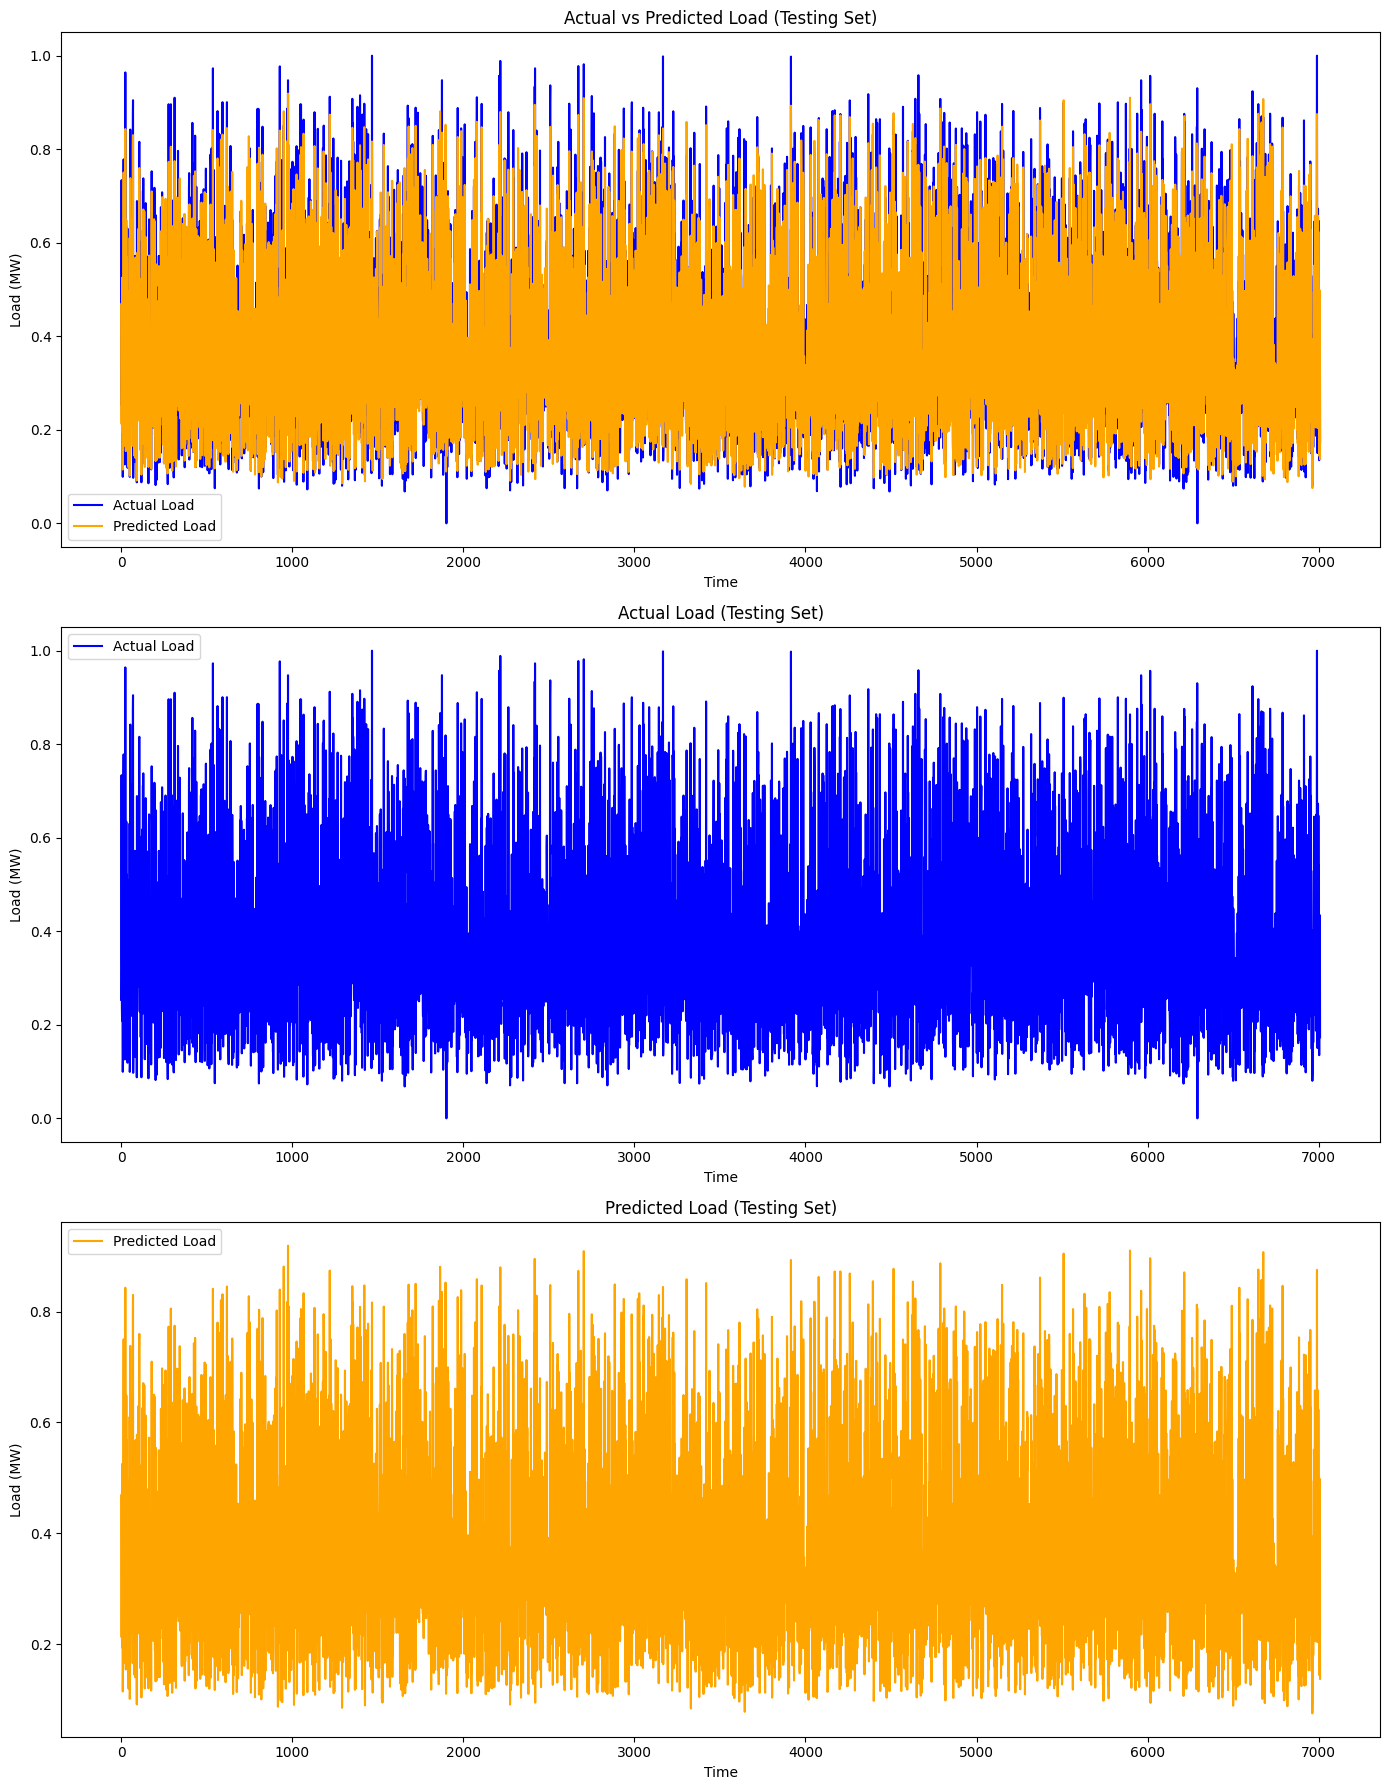

In [187]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate MAE and RMSE
train_mae = mean_absolute_error(scaled_y_train, scaled_train_predictions)
test_mae = mean_absolute_error(scaled_y_test, scaled_test_predictions)
train_rmse = np.sqrt(mean_squared_error(scaled_y_train, scaled_train_predictions))
test_rmse = np.sqrt(mean_squared_error(scaled_y_test, scaled_test_predictions))

# Calculate R² score
train_r2 = r2_score(scaled_y_train, scaled_train_predictions)
test_r2 = r2_score(scaled_y_test, scaled_test_predictions)

# Print the results
print(f'Training MAE: {train_mae}, RMSE: {train_rmse}, R²: {train_r2}')
print(f'Testing MAE: {test_mae}, RMSE: {test_rmse}, R²: {test_r2}')

# Step 8: Plot the results in separate subplots
plt.figure(figsize=(14, 18))

# Plot overlapping actual and predicted load
plt.subplot(3, 1, 1)
plt.plot(scaled_y_test, label='Actual Load', color='blue')
plt.plot(scaled_test_predictions, label='Predicted Load', color='orange')
plt.title('Actual vs Predicted Load (Testing Set)')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.legend()

# Plot actual load
plt.subplot(3, 1, 2)
plt.plot(scaled_y_test, label='Actual Load', color='blue')
plt.title('Actual Load (Testing Set)')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.legend()

# Plot predicted load
plt.subplot(3, 1, 3)
plt.plot(scaled_test_predictions, label='Predicted Load', color='orange')
plt.title('Predicted Load (Testing Set)')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.legend()

plt.tight_layout()
plt.show()